<center><b>© 2021. Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

#Data Understanding: Python Colab Introduction

## 1- Loading dataset from a package


Along with Numpy, [Pandas](https://pandas.pydata.org/) is one of the most used packages of python when it come to manipulating data. This would not be an introduction to Pandas, if you would like to learm more look at  [Python Data Science Handbook Chapter 3]( https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.00-Introduction-to-Pandas.ipynb).

We will be using the "diamonds" dataset from th [seaborn](https://seaborn.pydata.org/) pacakge.




In [10]:
# 1. Override DataFrame display to output markdown tables:
import pandas as pd
try:
    # Try to use tabulate if available; if not, install it.
    from tabulate import tabulate
except ImportError:
    !pip install tabulate
    from tabulate import tabulate

# Monkey-patch the HTML representation to a Markdown-friendly one
pd.DataFrame._repr_html_ = lambda self: tabulate(self, headers='keys', tablefmt='pipe')

# 2. Ensure that inline figures are in PNG format for nbconvert:
%config InlineBackend.figure_format = 'png'

In [11]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('diamonds')


This data is already a Pandas Data Frame object.

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data.head()  #The "head" method prints the frist 5 rows of the data frame

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [14]:
data.tail() #The "tail" method prints the last 5 rows of the data frame

carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

### Data dimensions

Once you see the data, you need to check how many features (columns) it has, and how many entities (rows). For this we can use the Pandas Data Frame method of ["shape"](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape) (this is very similar to the Numpy Array method of shape)

In [15]:
data.shape    #The 'shape" method show the total numer of row and columns

(53940, 10)

### Data Structure and type

To learn more about the different data types of Python review [Python Data Science Handbook Chapter 2]( https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.01-Understanding-Data-Types.ipynb#scrollTo=L6xNSSrJr_ho).  

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)|
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)|
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)|
| ``int8``      | Byte (-128 to 127)|
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)|
| ``uint8``     | Unsigned integer (0 to 255)|
| ``uint16``    | Unsigned integer (0 to 65535)|
| ``uint32``    | Unsigned integer (0 to 4294967295)|
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)|
| ``float_``    | Shorthand for ``float64``.|
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa|
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa|
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|
| ``complex_``  | Shorthand for ``complex128``.|
| ``complex64`` | Complex number, represented by two 32-bit floats|
| ``complex128``| Complex number, represented by two 64-bit floats|

In [16]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

From this we can see that we have a mix of nominal data types (i.e., 'category') and numeric data types (i.e., 'float64' & 'int64').

### Data Summary

We can use the Pandas Data Frame method ["describe()"](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to extract some summary statistics about our data

In [17]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

To calculate the mode, we can use the Pandas Data Frame method ["mode()"](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)

In [18]:
data.mode()

carat    cut color clarity  depth  table  price     x     y    z
0    0.3  Ideal     G     SI1   62.0   56.0    605  4.37  4.34  2.7

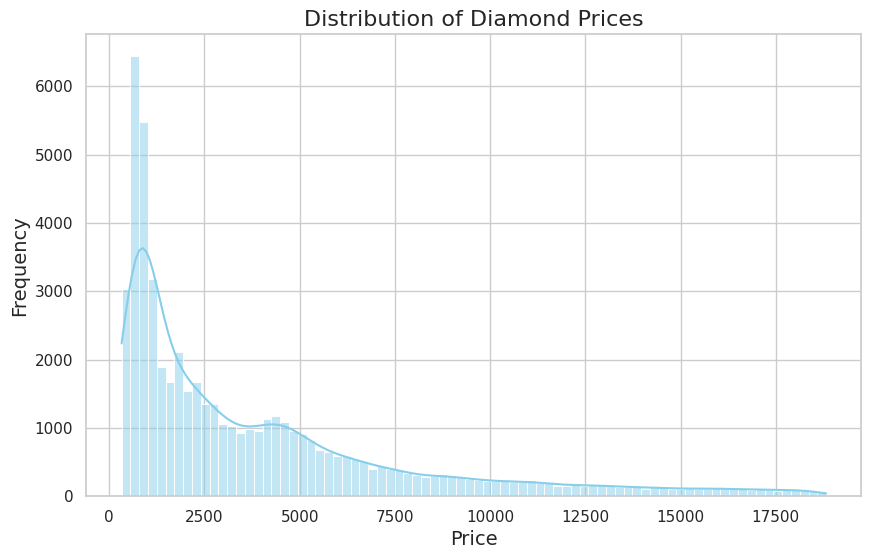

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
data = sns.load_dataset('diamonds')

# Set the visual style
sns.set(style="whitegrid")

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'price' column with a histogram and KDE
sns.histplot(data['price'], kde=True, color='skyblue')

# Customize the plot with title and labels
plt.title('Distribution of Diamond Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


## 2- Loading Data manually


A useful feature from Google Colab, is that you can access and manipulate files from your Google Drive. When you work directly with Jupyter Notebook in your computer, this would be like working with files directly in your computer.

To access the Google Drive files, we need to first “mount” your google drive and provide the “directory” you want to work on. Run the code cell, click on the link,  provide the code for your Google Drive, and press ENTER.


In [20]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Working_Directory = 'My Drive/DS_201' #@param {type:"string"}
wd="/content/gdrive/"+Working_Directory
os.chdir(wd)


dirpath = os.getcwd()
print("current directory is : " + dirpath)





MessageError: Error: credential propagation was unsuccessful

This command show all the files in the current directory

Now, we can directly download files from an URL (like GitHub).

We can use the 'wget' command line:

In [21]:
!wget "https://raw.githubusercontent.com/lopezbec/COVID19_Tweets_Dataset/main/Summary_Details/SUMMARY_moth.csv"

--2025-02-27 19:39:53--  https://raw.githubusercontent.com/lopezbec/COVID19_Tweets_Dataset/main/Summary_Details/SUMMARY_moth.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3306 (3.2K) [text/plain]
Saving to: ‘SUMMARY_moth.csv’

SUMMARY_moth.csv    100%[===================>]   3.23K  --.-KB/s    in 0s      

2025-02-27 19:39:53 (49.1 MB/s) - ‘SUMMARY_moth.csv’ saved [3306/3306]



OR we can use the request package  (if using Jupyter notebooks in you computer, you might not be able to run the "wget" commands)

In [22]:
# imported the requests library
import requests
URL = "https://raw.githubusercontent.com/lopezbec/COVID19_Tweets_Dataset/main/Summary_Details/SUMMARY_moth.csv"

# URL of the file to be downloaded
r = requests.get(URL) # create HTTP response object

# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open("SUMMARY_moth_v2.csv",'wb') as f:

    # Saving received content as a csv file in
    # binary format

    # write the contents of the response (r.content)
    # to a new file in binary mode.
    f.write(r.content)

Now that the file is in the working direcotyl, we can read it suing Pandas ‘read_csv” method

In [23]:
import pandas as pd

data = pd.read_csv('SUMMARY_moth_v2.csv')

data.head()

Unnamed: 0  Year  Month  Avg #OR   Avg #RT  Avg Tweets      # OR      # RT  \
0           1  2020      1   5947.0   30576.5     35501.5   1958346   7852504   
1           2  2020      2  10978.0   29918.0     40604.5   7624648  21944443   
2           3  2020      3  13095.5   44714.5     56283.0  12610824  46659589   
3           4  2020      4  30091.0   89513.0    119859.5  20594379  60311559   
4           5  2020      5  35163.0  100022.5    135709.0  26307406  73792461   

      #Total  Total Geo   Max Rt  MD RT  Max Like  MD Like  
0    9810850       1773   674151  166.5    334802        0  
1   29568948       8103   469739   50.0    637589        0  
2   59270412      19952  1064693  159.0   1255858        0  
3   80905936      38220   649823   36.0    662005        0  
4  100099863      47777  1007616   27.0    929811        0

In [24]:
!jupyter nbconvert --to markdown "Data_Understanding.ipynb"

[NbConvertApp] WARNING | pattern 'Data_Understanding.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec

In [25]:
!pwd

/content
